In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# =============================
# Load Dataset & Preprocess
# =============================
df = pd.read_csv("3_modified.csv")
print("Original Shape:", df.shape)
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("After Removing Duplicates:", df.shape)

Original Shape: (108, 16)
Duplicate Rows: 0
After Removing Duplicates: (108, 16)


In [96]:
df

,Unnamed: 0,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,0,C1S1G5,R1,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,1,C2S3G4,R1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,2,C2S1G6,R1,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,3,C1S1G1,R1,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,4,C1S2G6,R2,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,319,C1S2G3,R3,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32
104,339,C1S3G2,R2,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,5643.7,2.60,0.36
105,365,C2S1G5,R2,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,3067.1,1.80,1.15
106,367,C2S2G4,R1,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,3112.2,2.10,0.17


#FULL DATA EXCEPT PARAMETERS COLUMN

In [97]:
# =============================
# Select Features for Clustering
# =============================

# X = df[features].copy()
X = df.iloc[:, 3:].copy()

# Drop missing values if any
X = X.dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

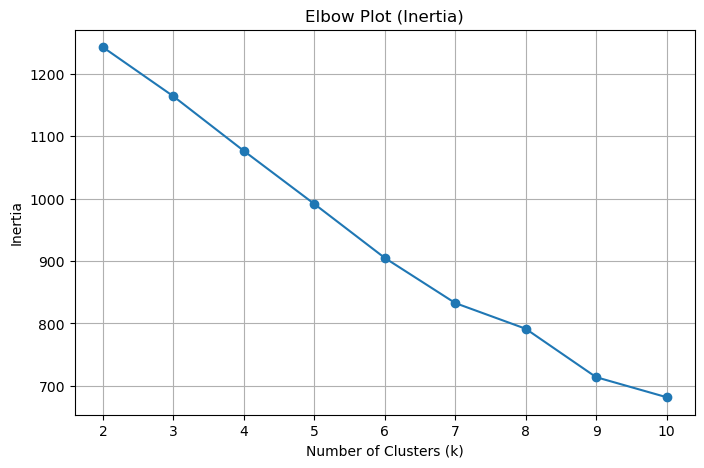

In [98]:
# =============================
# Elbow Method Plot (Inertia)
# =============================
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7):
    """
    Plots Silhouette Score vs. number of clusters (k).

    Parameters:
    -----------
    X_scaled : array-like
        Scaled feature matrix.
    k_min : int
        Minimum number of clusters to try (default=2).
    k_max : int
        Maximum number of clusters to try (default=7).
    """
    silhouette_scores = []
    k_values = range(k_min, k_max + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

        from sklearn.decomposition import PCA

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
        plt.title(f'KMeans k={k} Clustering (PCA View)')
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(title="Cluster")
        plt.show()

        print(f"k = {k} ➜ Silhouette Score = {score:.4f}")


    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='navy')
    plt.title("Silhouette Score vs. Number of Clusters (k) - KMeans")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


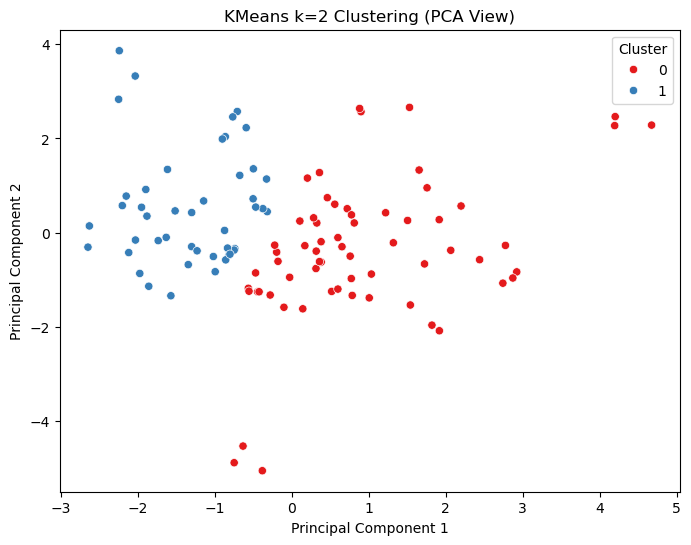

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k = 2 ➜ Silhouette Score = 0.1057


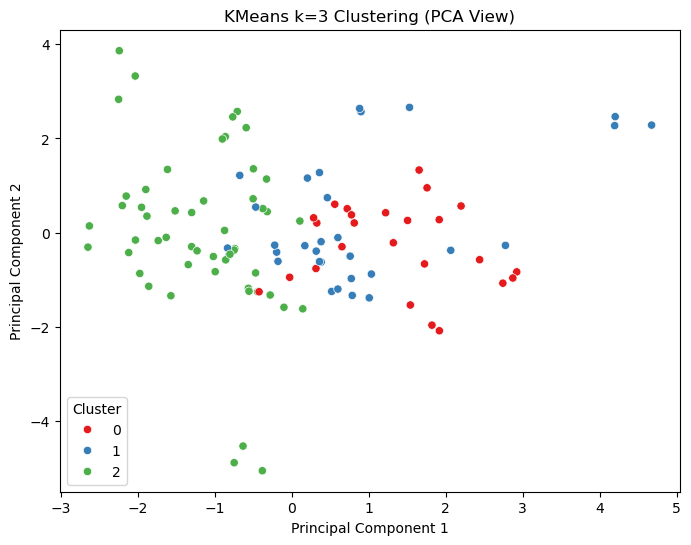

k = 3 ➜ Silhouette Score = 0.0795


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


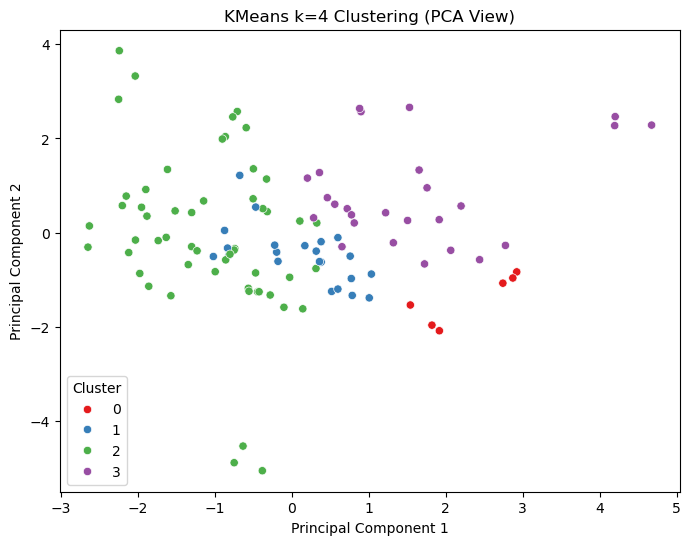

k = 4 ➜ Silhouette Score = 0.0982


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


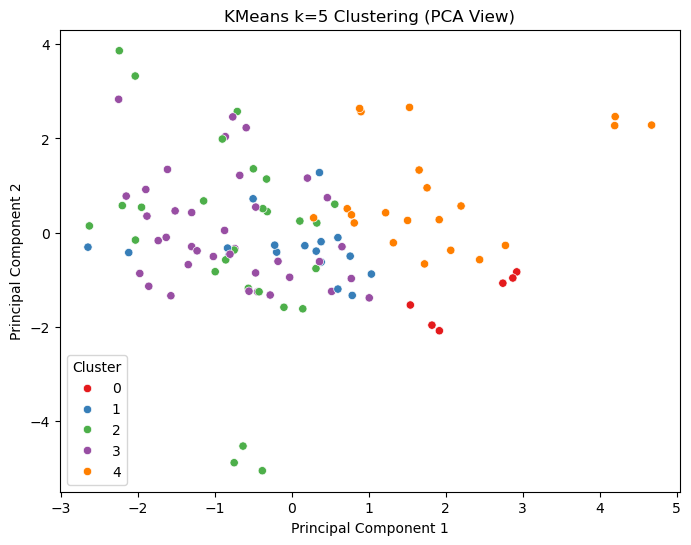

k = 5 ➜ Silhouette Score = 0.1117


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


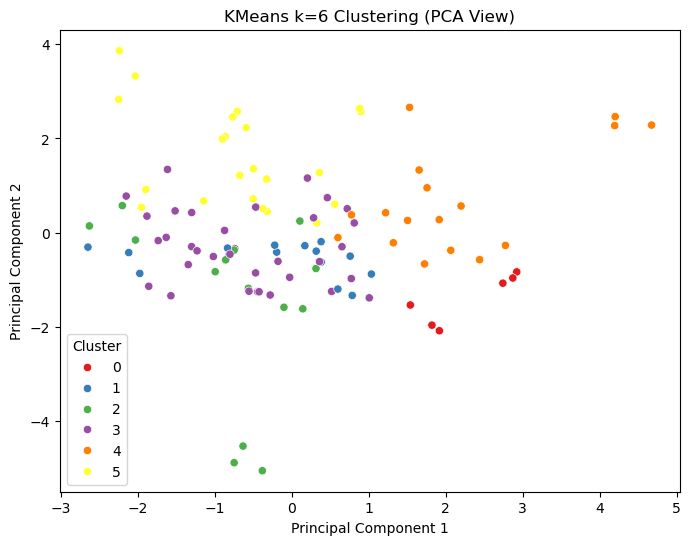

k = 6 ➜ Silhouette Score = 0.1262


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


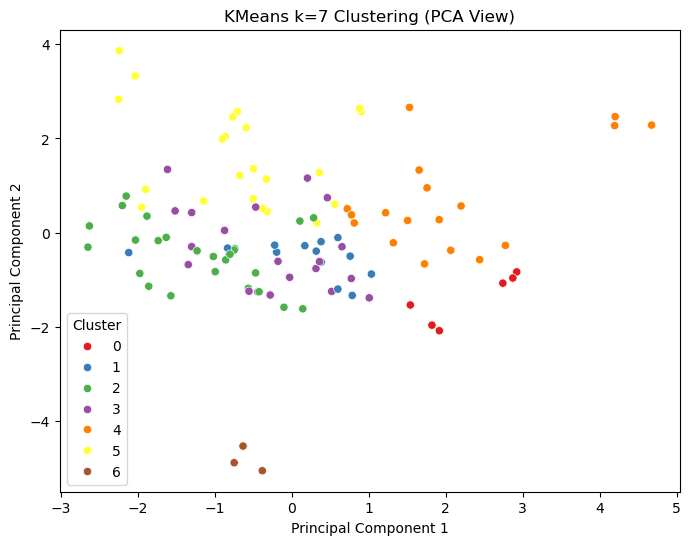

k = 7 ➜ Silhouette Score = 0.1418


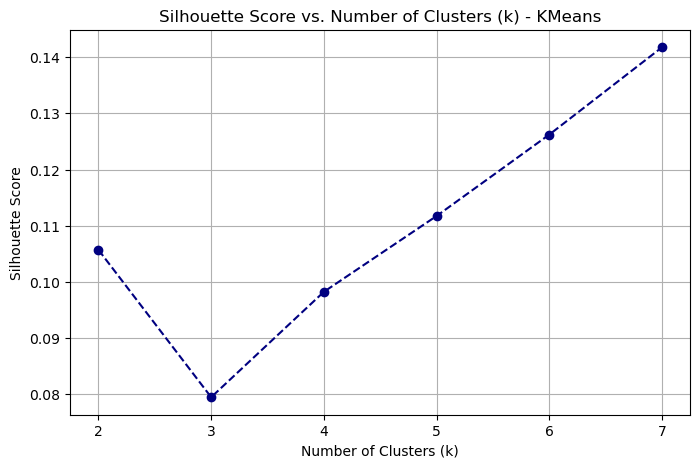

In [100]:
plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7)

#ONLY OUTPUT FEATURES (QUANTITY & QUALITY)

In [101]:
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)", "Protein Percentage (PPE)"]
X = df[features].dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

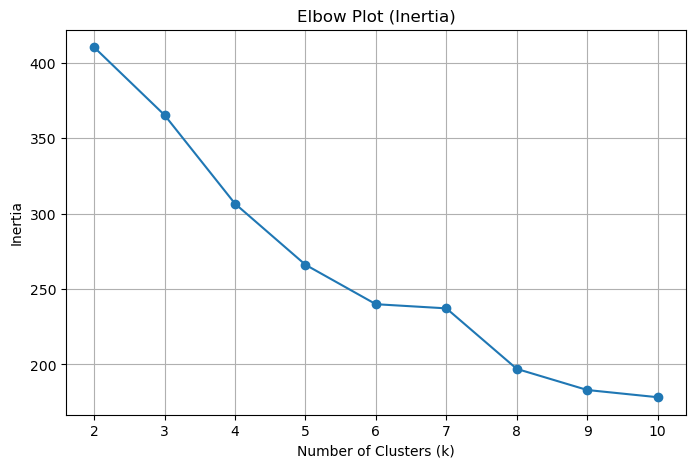

In [102]:
# =============================
# Elbow Method Plot (Inertia)
# =============================
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


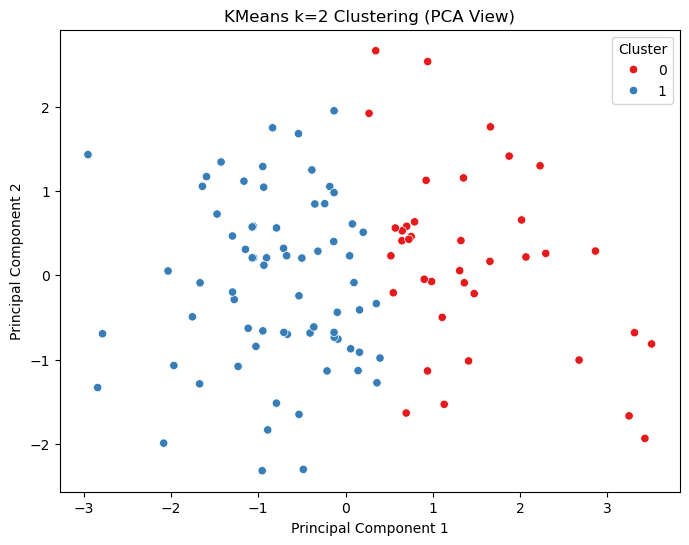

k = 2 ➜ Silhouette Score = 0.2304


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


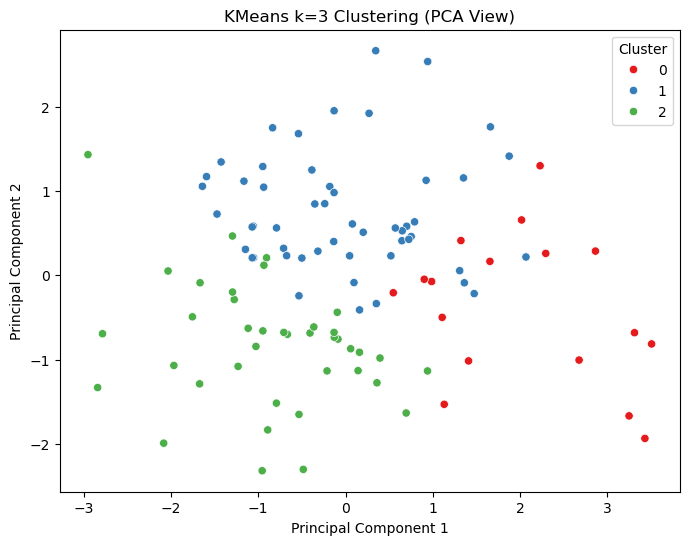

k = 3 ➜ Silhouette Score = 0.1667


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


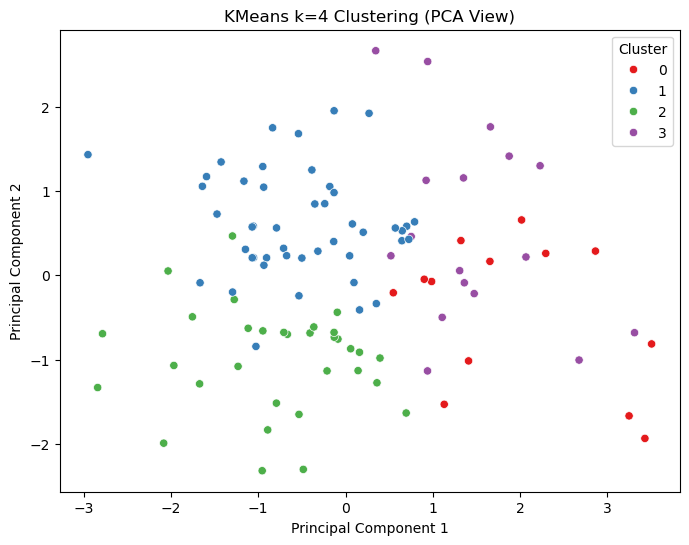

k = 4 ➜ Silhouette Score = 0.1947


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


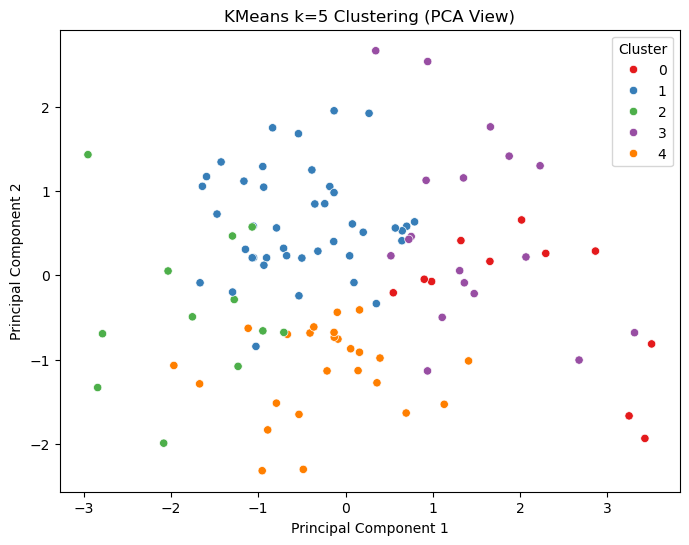

k = 5 ➜ Silhouette Score = 0.2040


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


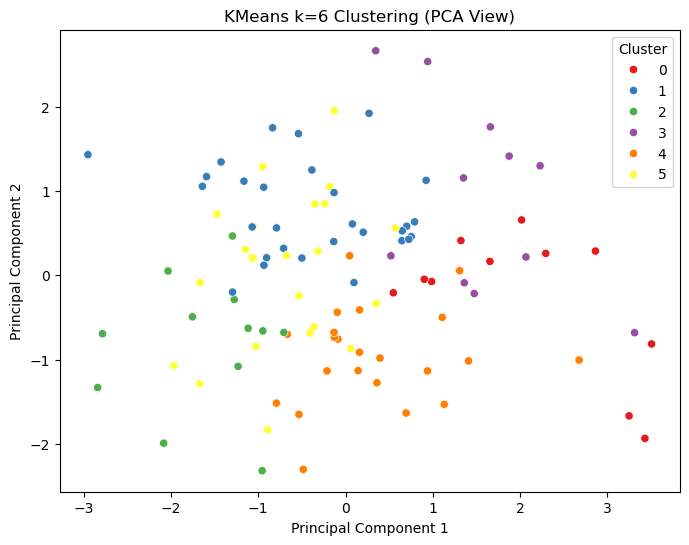

k = 6 ➜ Silhouette Score = 0.2061


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


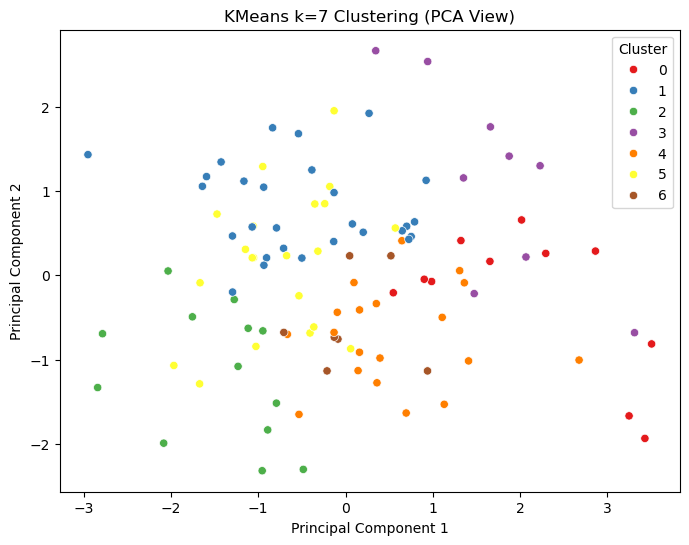

k = 7 ➜ Silhouette Score = 0.1791


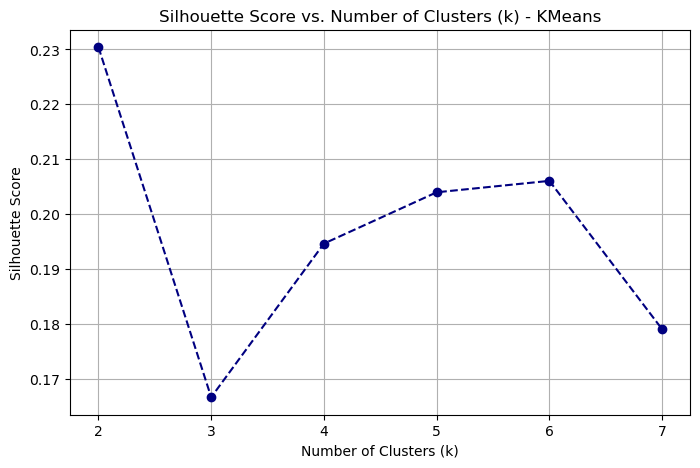

In [103]:
plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7)

# USING THE FEATURES = ["Sugars (Su)", "Weight of 300 Seeds (W3S)", "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)","Protein Percentage (PPE)", "Protein Content (PCO)"]

In [104]:
features = ["Sugars (Su)", "Weight of 300 Seeds (W3S)",
            "Seed Yield per Unit Area (SYUA)", "Number of Seeds per Pod (NSP)", "Protein Percentage (PPE)", "Protein Content (PCO)" ]
X = df[features].dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# For KMeans

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


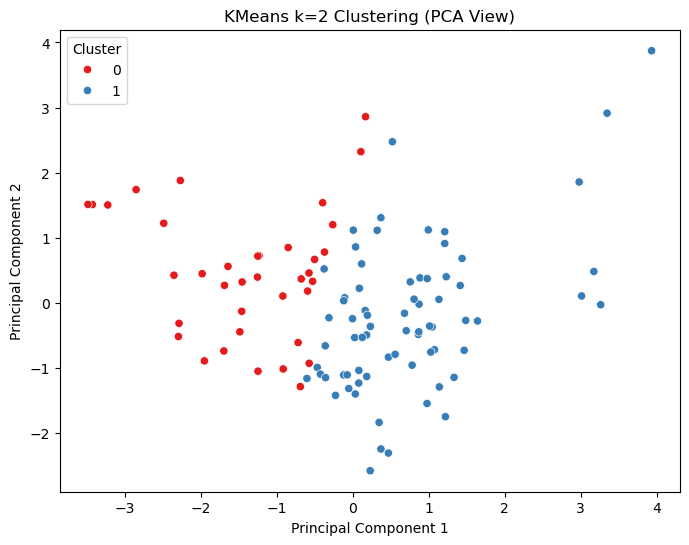

k = 2 ➜ Silhouette Score = 0.1965


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


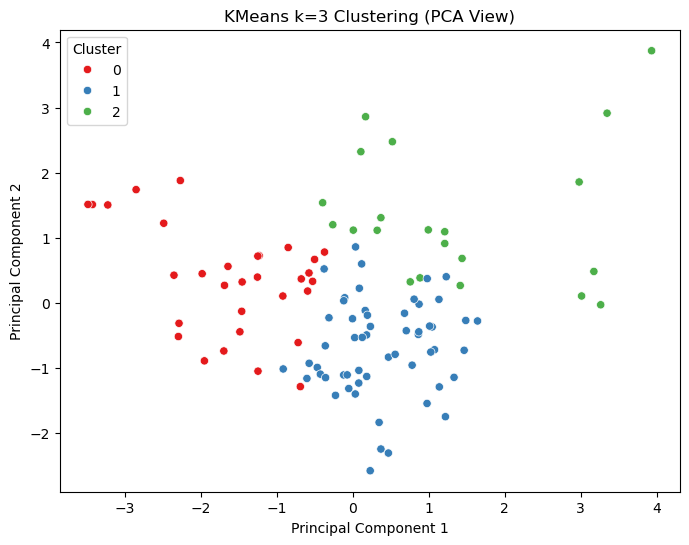

k = 3 ➜ Silhouette Score = 0.1931


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


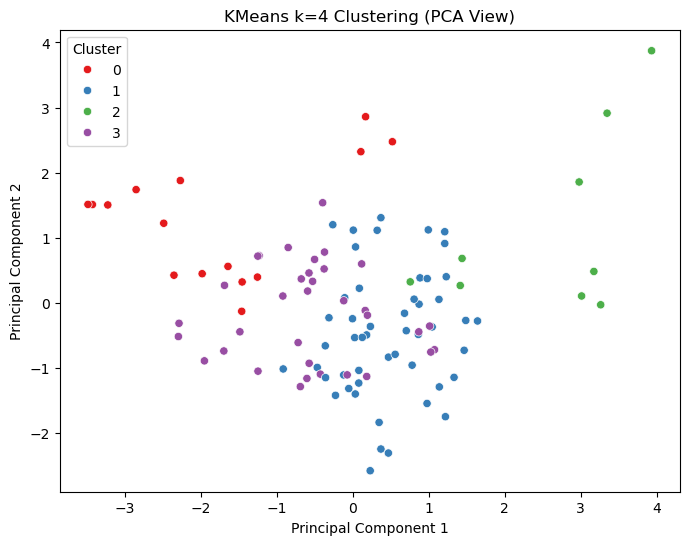

k = 4 ➜ Silhouette Score = 0.1728


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


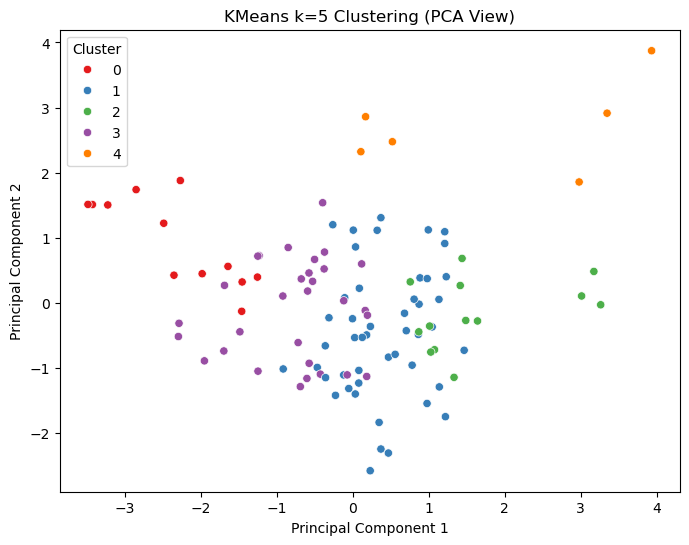

k = 5 ➜ Silhouette Score = 0.1844


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


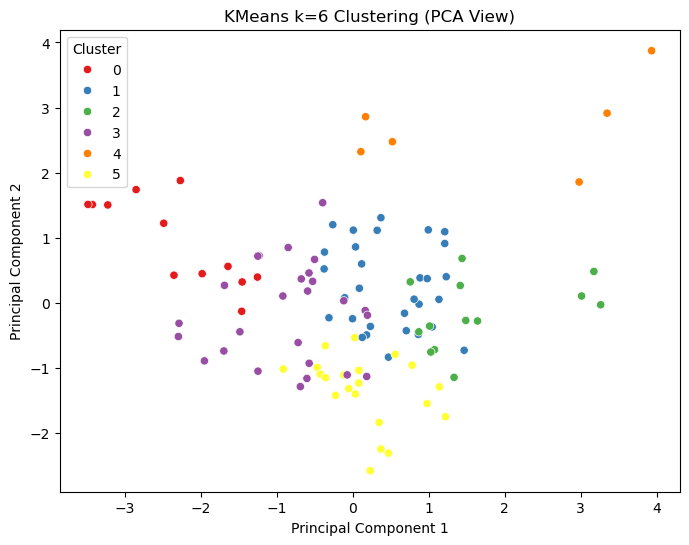

k = 6 ➜ Silhouette Score = 0.1927


c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


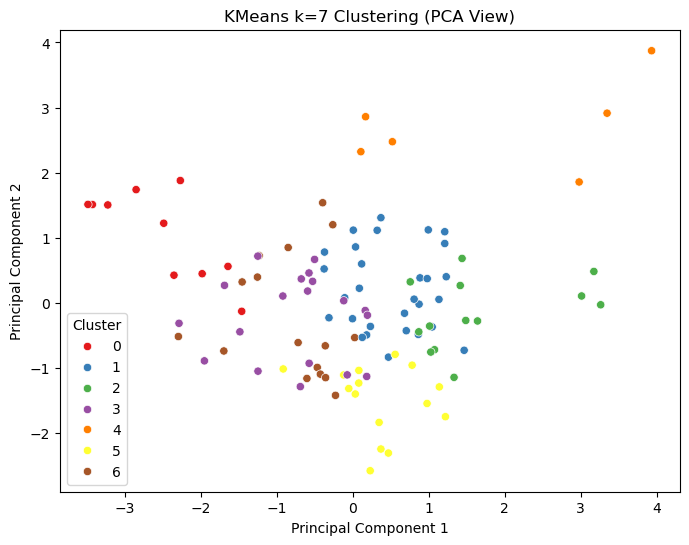

k = 7 ➜ Silhouette Score = 0.1914


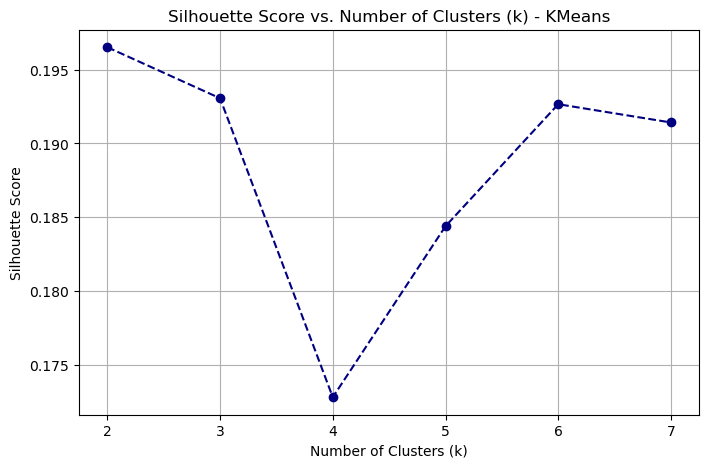

In [105]:
plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7)

# For k_medoids

In [106]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7):
    """
    Plots Silhouette Score vs. number of clusters (k).

    Parameters:
    -----------
    X_scaled : array-like
        Scaled feature matrix.
    k_min : int
        Minimum number of clusters to try (default=2).
    k_max : int
        Maximum number of clusters to try (default=7).
    """
    silhouette_scores = []
    k_values = range(k_min, k_max + 1)

    for k in k_values:
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        labels = kmedoids.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

        from sklearn.decomposition import PCA

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1')
        plt.title(f'KMedoids k={k} Clustering (PCA View)')
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(title="Cluster")
        plt.show()

        print(f"k = {k} ➜ Silhouette Score = {score:.4f}")


    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='navy')
    plt.title("Silhouette Score vs. Number of Clusters (k) - KMedoids")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

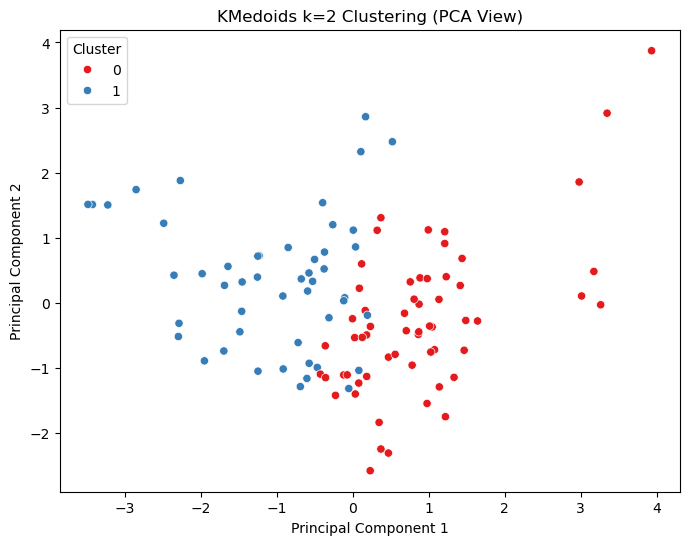

k = 2 ➜ Silhouette Score = 0.1647


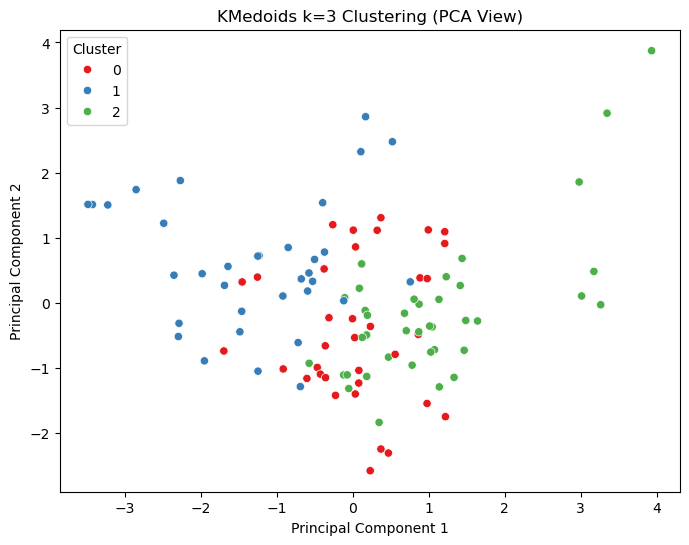

k = 3 ➜ Silhouette Score = 0.1405


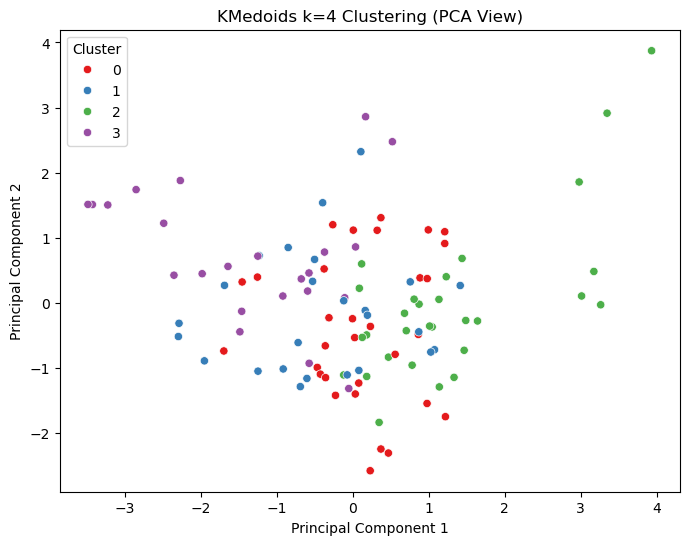

k = 4 ➜ Silhouette Score = 0.1071


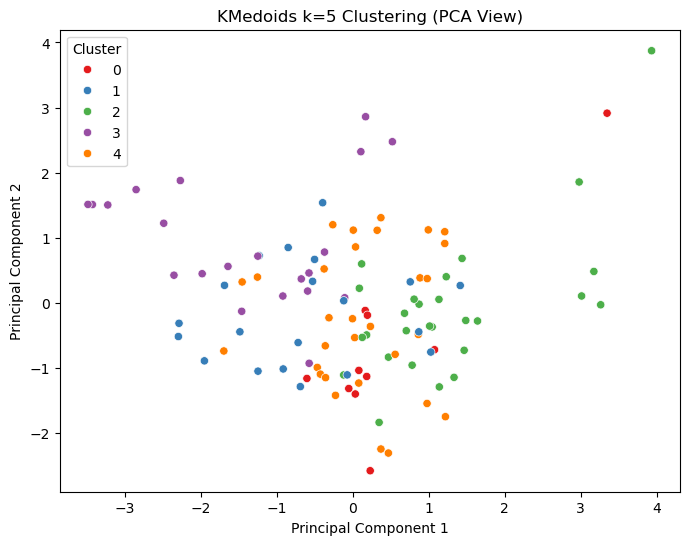

k = 5 ➜ Silhouette Score = 0.0983


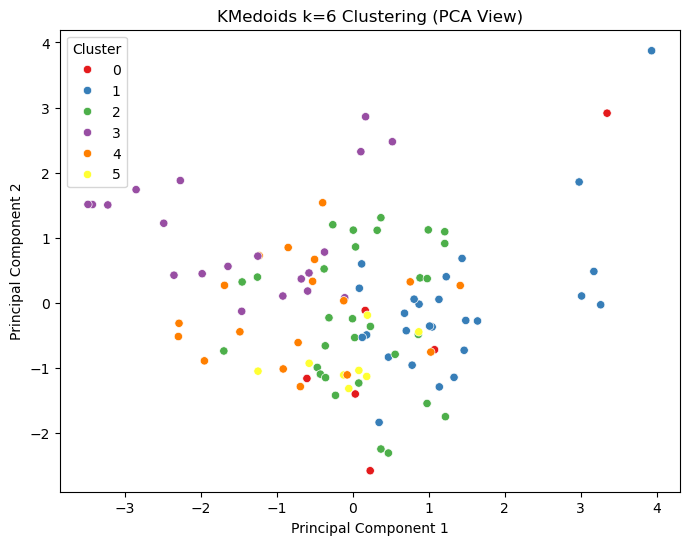

k = 6 ➜ Silhouette Score = 0.0788


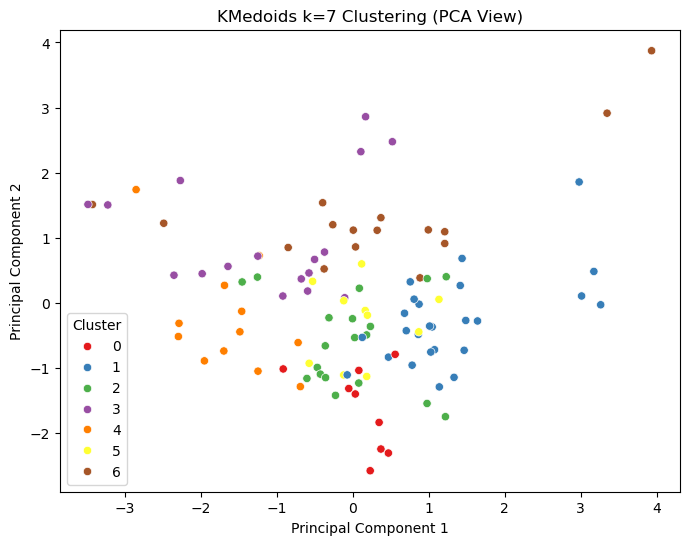

k = 7 ➜ Silhouette Score = 0.0825


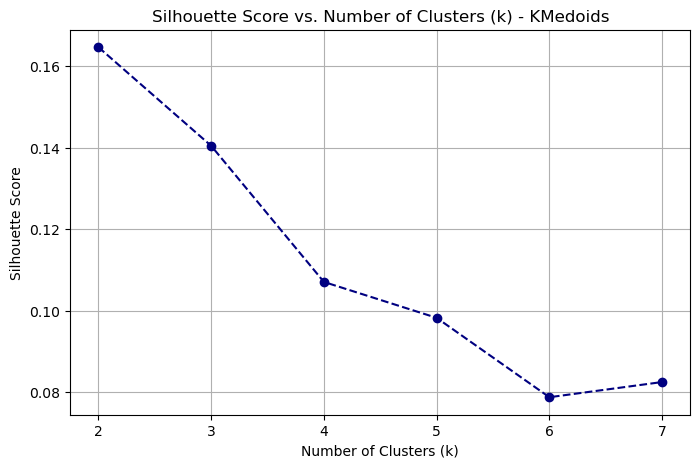

In [107]:
plot_silhouette_vs_k(X_scaled, k_min=2, k_max=7)

In [108]:
# KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans = df[features].dropna().copy()
df_kmeans["KMeans_Label"] = kmeans.fit_predict(X_scaled)

# KMedoids clustering with k=2
kmedoids = KMedoids(n_clusters=2, random_state=42)
df_kmedoids = df[features].dropna().copy()
df_kmedoids["KMedoids_Label"] = kmedoids.fit_predict(X_scaled)

c:\Users\utkar\.conda\envs\AI_Lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\3738898933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


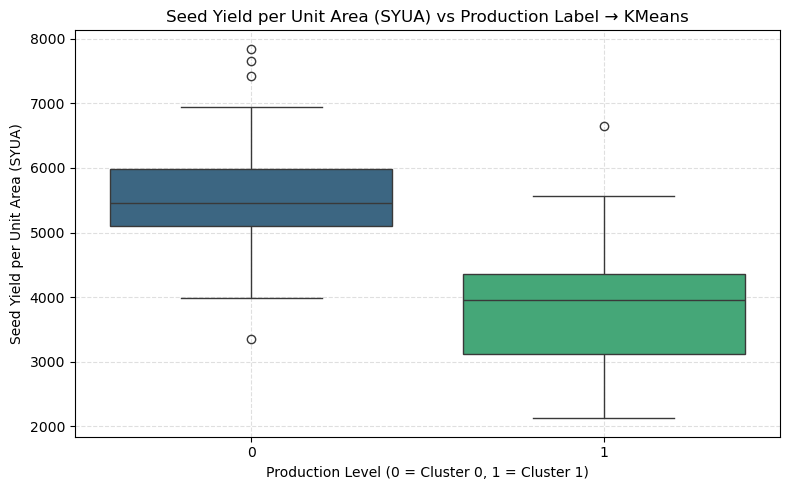

C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\3738898933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


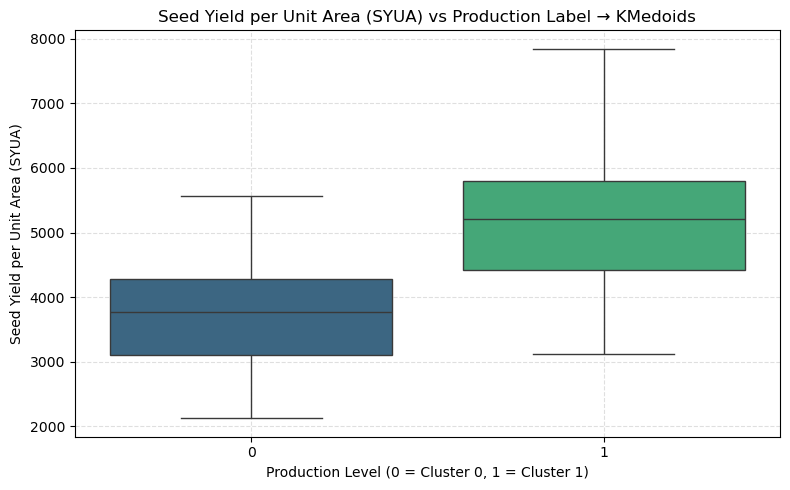

In [109]:
# Prepare for plotting
labeled_frames = [
    ("KMeans", df_kmeans, "KMeans_Label"),
    ("KMedoids", df_kmedoids, "KMedoids_Label"),
]

# Boxplot for each cluster assignment
for feature in ["Seed Yield per Unit Area (SYUA)"]:
    for name, df_labeled, label_col in labeled_frames:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")
        plt.title(f"{feature} vs Production Label → {name}")
        plt.xlabel("Production Level (0 = Cluster 0, 1 = Cluster 1)")
        plt.ylabel(f"{feature}")
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()


In [110]:
# Invert KMeans labels (0 becomes 1 and 1 becomes 0)
df_kmeans["KMeans_Label"] = 1 - df_kmeans["KMeans_Label"]

C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\1292186466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


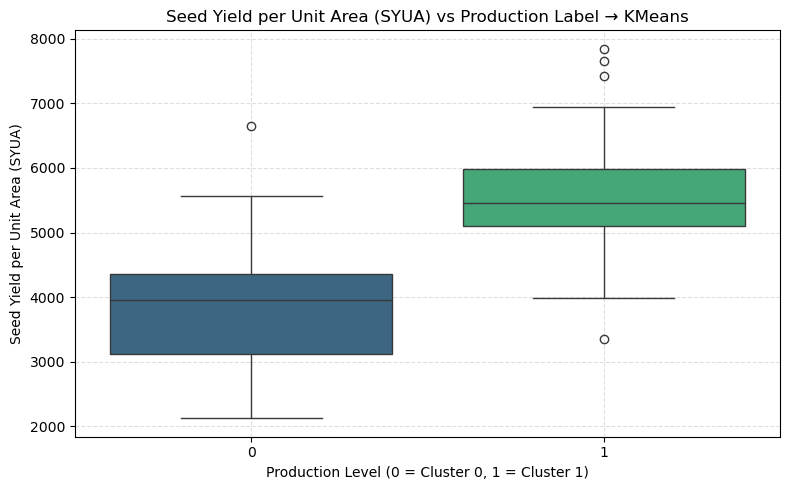

C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\1292186466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


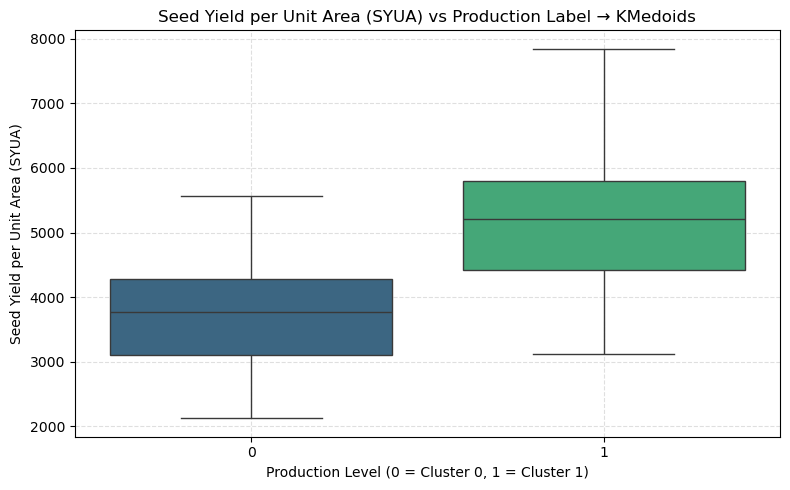

C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\1292186466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


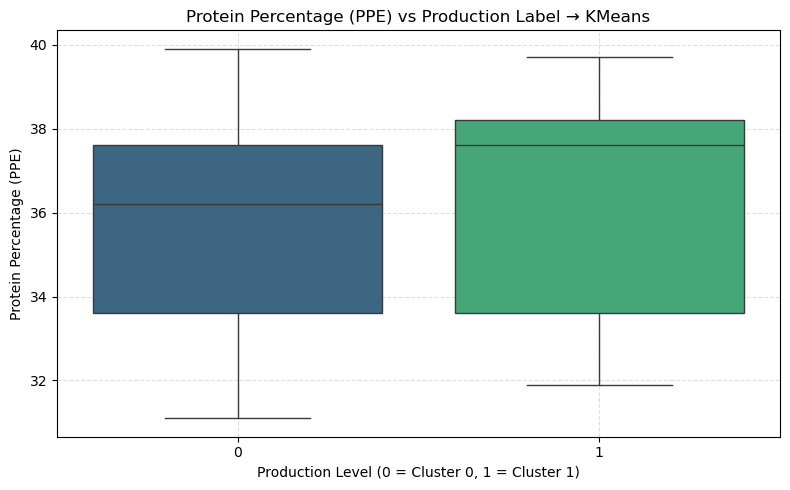

C:\Users\utkar\AppData\Local\Temp\ipykernel_22684\1292186466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")


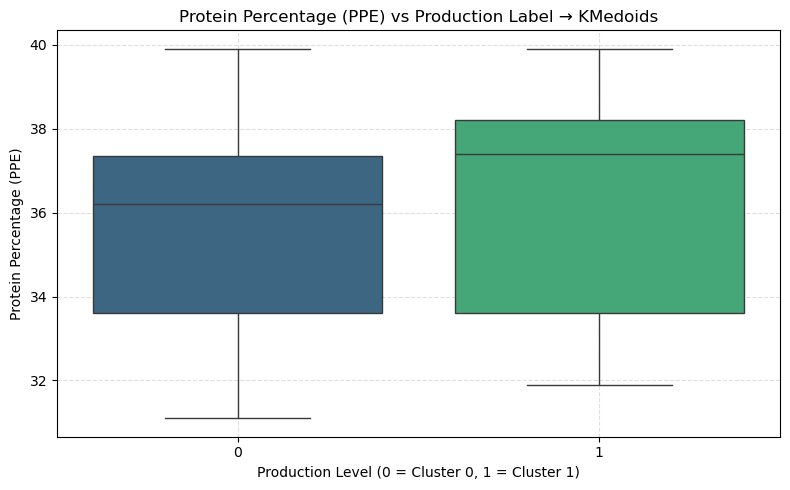

In [113]:
# Prepare for plotting
labeled_frames = [
    ("KMeans", df_kmeans, "KMeans_Label"),
    ("KMedoids", df_kmedoids, "KMedoids_Label"),
]

# Boxplot for each cluster assignment
for feature in ["Seed Yield per Unit Area (SYUA)", "Protein Percentage (PPE)"]:
    for name, df_labeled, label_col in labeled_frames:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_labeled, x=label_col, y=feature, palette="viridis")
        plt.title(f"{feature} vs Production Label → {name}")
        plt.xlabel("Production Level (0 = Cluster 0, 1 = Cluster 1)")
        plt.ylabel(f"{feature}")
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()


In [112]:
# Export KMeans clustered dataset (k=2)
df_kmeans.to_csv("kmeans_k2_clustered.csv", index=False)

# Export KMedoids clustered dataset (k=2)
df_kmedoids.to_csv("kmedoids_k2_clustered.csv", index=False)